In [154]:
import os
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix


In [75]:
df = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\KNN\glass.csv")

In [76]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [77]:
#checking the shape of data 
df.shape

(214, 10)

In [78]:
#checking if any null values 
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [79]:
#checking info of our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [80]:
#chceking with descriptive statistics 
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# EDA and Visualisation

<AxesSubplot:>

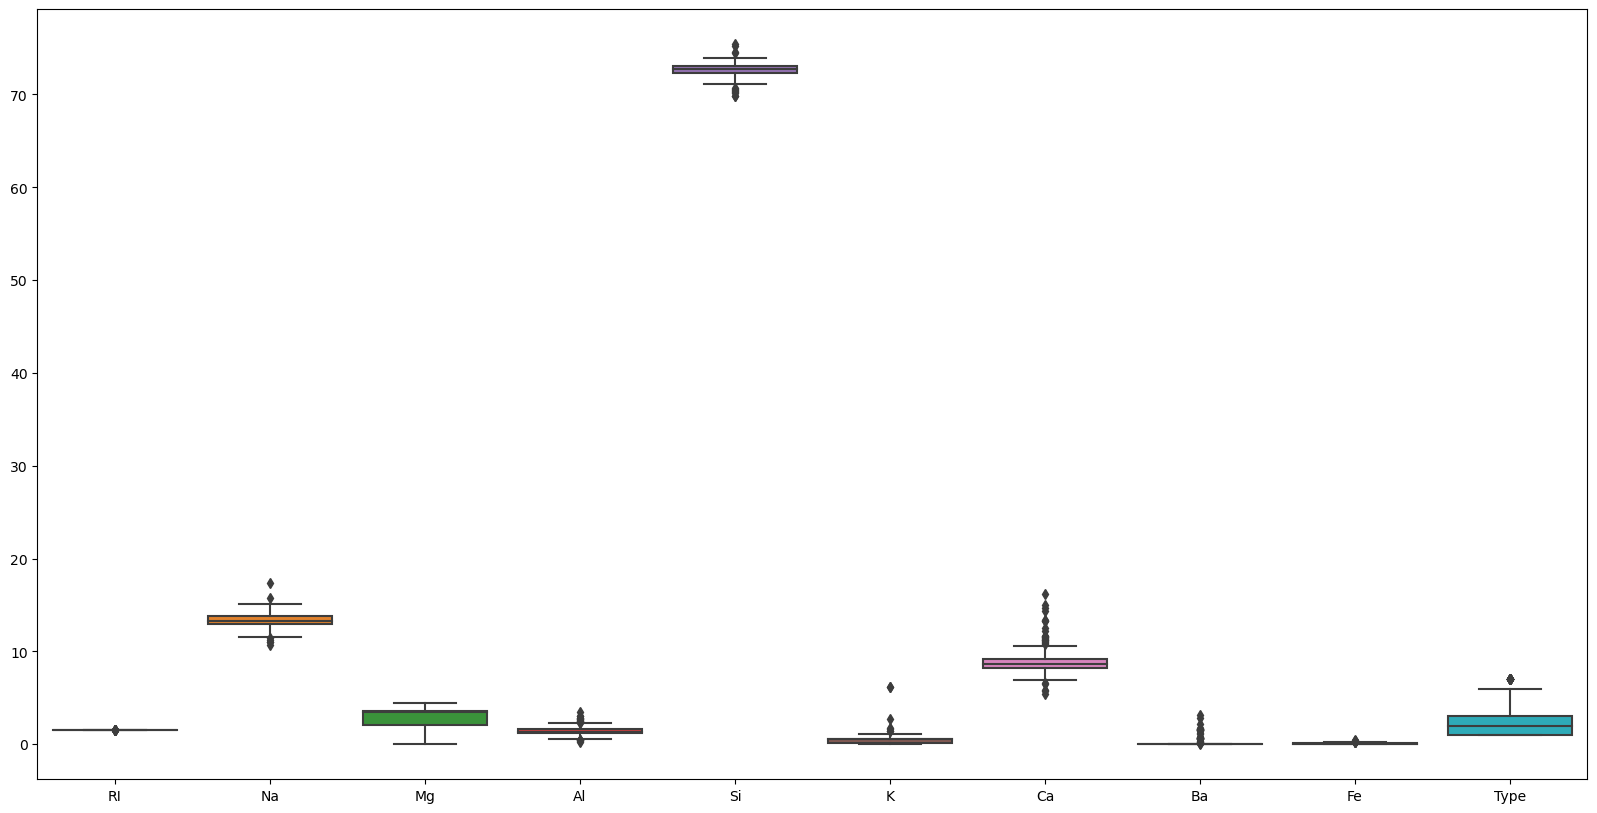

In [81]:
plt.figure(figsize=(20,10))
sn.boxplot(data= df)

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

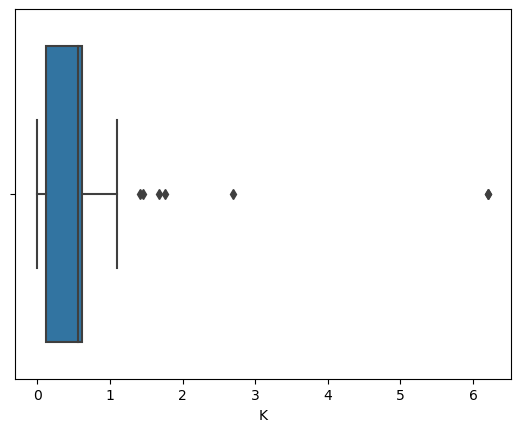

In [82]:
#plotting boxplot for potassium for outlier
sn.boxplot(df['K'])


In [83]:
#treating outliers for potassium with using iqr method 

q1 = df['K'].quantile(0.25)
q3 = df['K'].quantile(0.75)
iqr = q3 - q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)

print(ul,ll)

1.34125 -0.6087499999999999


In [84]:
#finding the outliers
df[df['K']>ul]
df[df['K']<ll]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [85]:
#trimming our outliers 
df2 = df[df['K']<ul]
df2.shape

(207, 10)

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

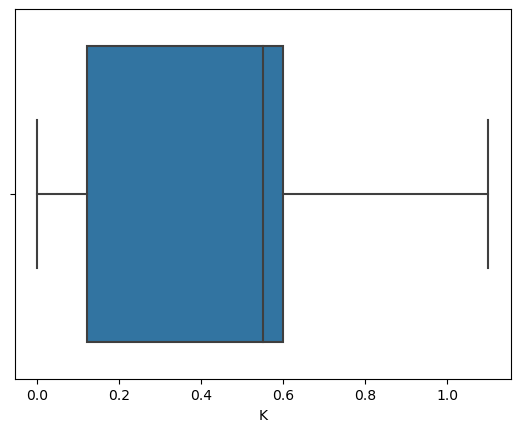

In [86]:
#plotting boxplot for potassium after trimming
sn.boxplot(df2['K'])


In [87]:
#capping on potassium 
df2 = df2.copy()
df2['K'] = np.where(
df2['K']>ul,
ul,
np.where(
df2['K']<ll,
ll,
df2['K']))


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

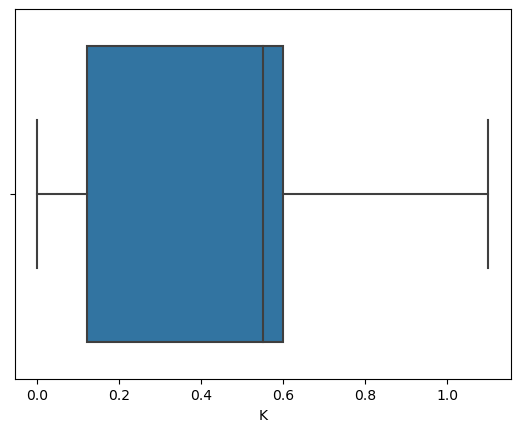

In [88]:
#plotting boxplot for potassium afer capping
sn.boxplot(df2['K'])


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na'>

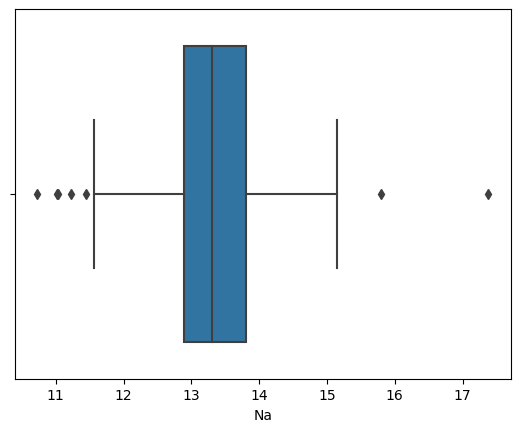

In [89]:
#plotting boxplot for sodium for outlier
sn.boxplot(df2['Na'])


In [90]:
#treating outliers for sodium with using iqr method 

q1 = df['Na'].quantile(0.25)
q3 = df['Na'].quantile(0.75)
iqr = q3 - q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)

print(ul,ll)

15.201249999999998 11.531250000000004


In [91]:
#finding the outliers
df[df['Na']>ul]
df[df['Na']<ll]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5


In [92]:
#trimming our outliers 
df2 = df[df['Na']<ul]
df2.shape

(212, 10)

In [93]:
#capping on sodium
df2 = df2.copy()
df2['Na'] = np.where(
df2['Na']>ul,
ul,
np.where(
df2['Na']<ll,
ll,
df2['Na']))


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na'>

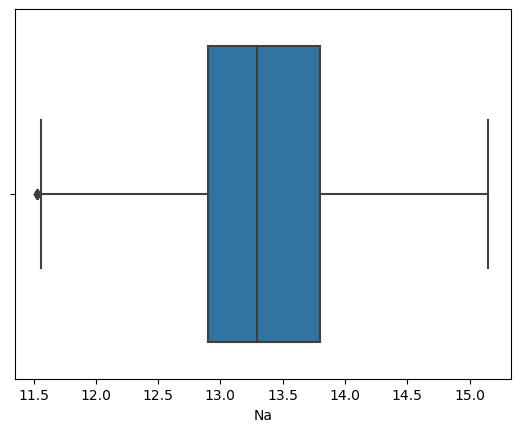

In [94]:
#plotting boxplot for sodium after capping
sn.boxplot(df2['Na'])


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ca'>

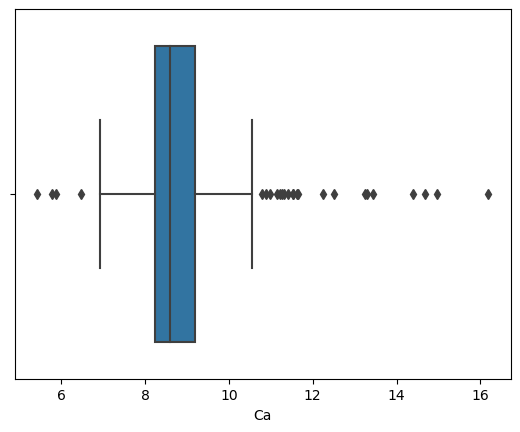

In [95]:
#checking for calcium as intuition of potential outliers
sn.boxplot(df2['Ca'])


In [96]:
#treating outliers for calcium with using iqr method 

q1 = df['Ca'].quantile(0.25)
q3 = df['Ca'].quantile(0.75)
iqr = q3 - q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)

print(ul,ll)

10.57125 6.841250000000001


In [97]:
#finding the outliers
df[df['Ca']>ul]
df[df['Ca']<ll]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.0,5
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.0,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.0,7
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7


In [98]:
#trimming our outliers 
df2 = df[df['Ca']<ul]
df2.shape

(193, 10)

In [99]:
#capping on sodium
df2 = df2.copy()
df2['Ca'] = np.where(
df2['Ca']>ul,
ul,
np.where(
df2['Ca']<ll,
ll,
df2['Ca']))


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ca'>

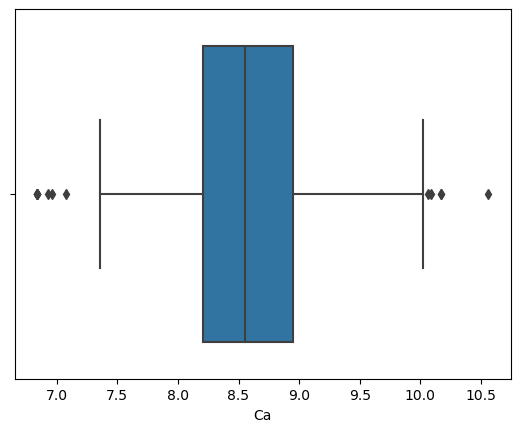

In [100]:
#checking for calcium after capping
sn.boxplot(df2['Ca'])


<AxesSubplot:>

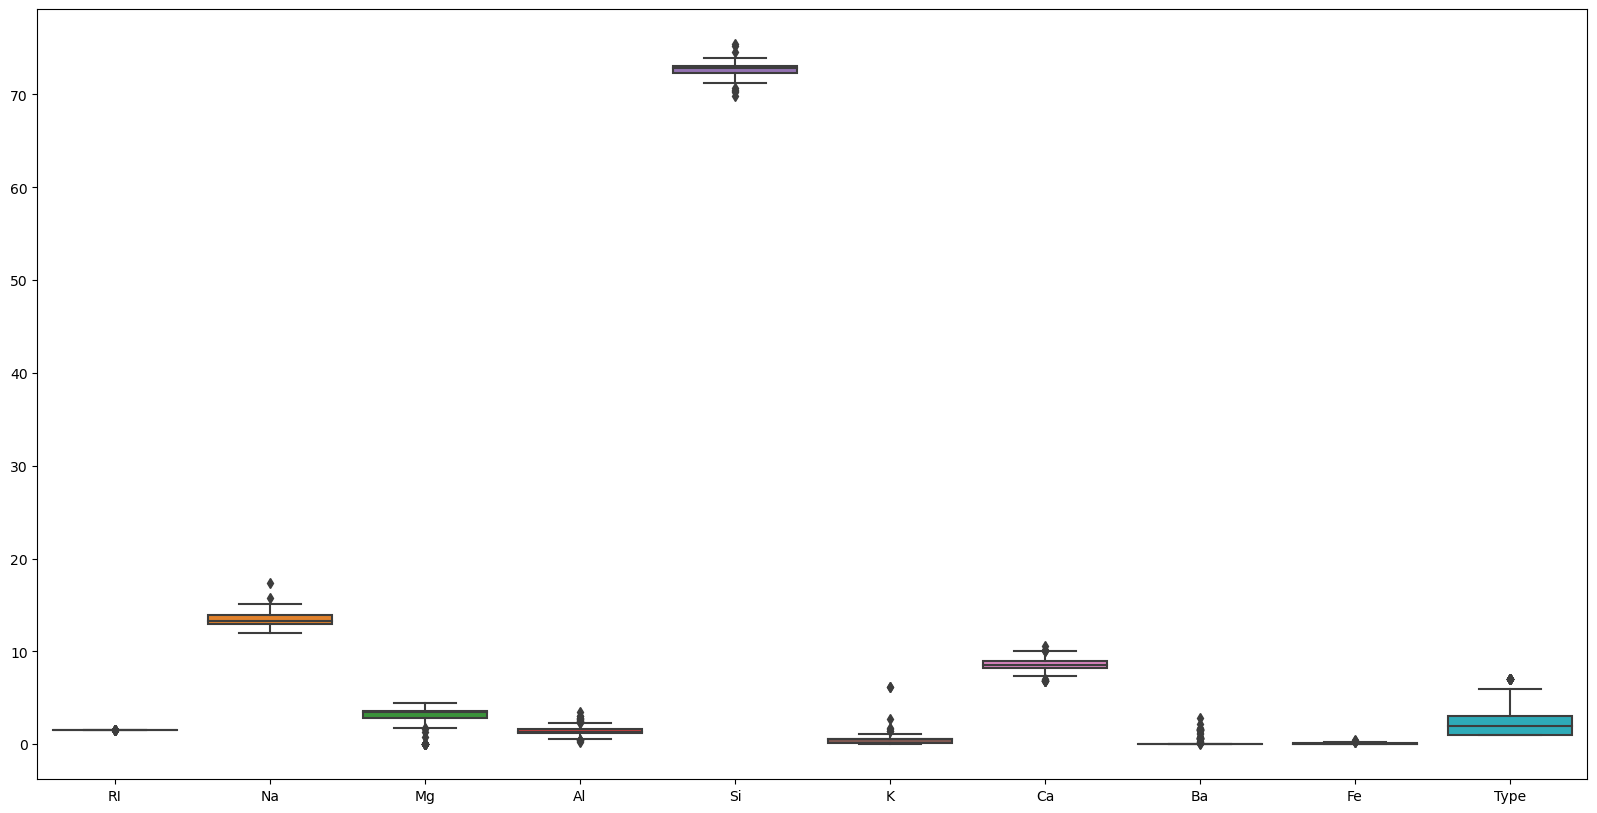

In [101]:
#checking if we have any outliers 
plt.figure(figsize=(20,10))
sn.boxplot(data= df2)

In [102]:
## since the distance of outliers are lesser so we can proceed further ##

Text(0, 0.5, 'frequency')

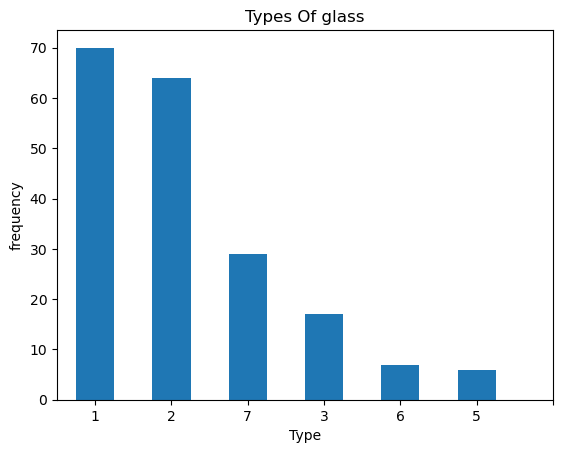

In [103]:
#cheking the balance of our dependent data with count plot 
type_class = pd.value_counts(df2['Type'],sort = True,ascending=False)
type_class.plot(kind ='bar',rot =0)
plt.title('Types Of glass')
plt.xticks(range(7))
plt.xlabel('Type')
plt.ylabel('frequency')

In [104]:
#cheking with the value counts 
df2['Type'].value_counts()

1    70
2    64
7    29
3    17
6     7
5     6
Name: Type, dtype: int64

# Smote Technique to treat undersampling 

In [105]:
sm = SMOTETomek(sampling_strategy='minority',random_state=42)
X_re,y_re = sm.fit_resample(df2.drop(['Type'],axis=1),df2['Type'])

In [106]:
df3 = pd.concat([pd.DataFrame(y_re),pd.DataFrame(X_re)],axis =1)

In [108]:
X_re.shape,y_re.shape

((241, 9), (241,))

In [109]:
#cheking with the value counts 
df3['Type'].value_counts()

5    70
1    62
2    59
7    29
3    14
6     7
Name: Type, dtype: int64

Text(0, 0.5, 'frequency')

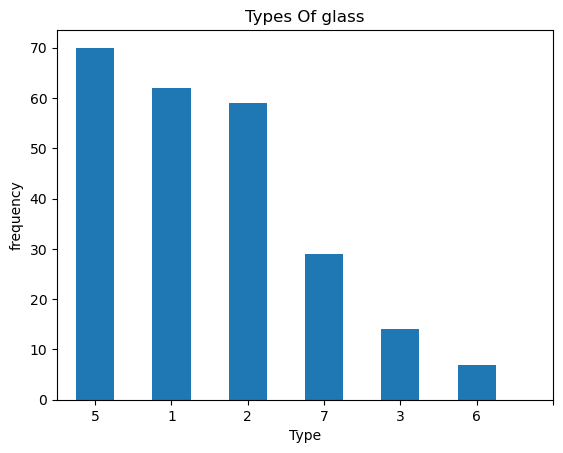

In [115]:
#cheking the balance of our dependent data with count plot after smote tomek
type_class = pd.value_counts(df3['Type'],sort = True,ascending=False)
type_class.plot(kind ='bar',rot =0)
plt.title('Types Of glass')
plt.xticks(range(7))
plt.xlabel('Type')
plt.ylabel('frequency')

In [116]:
## since we have balanced our data now we can start our KNN ##

In [119]:
df3.shape

(241, 10)

In [128]:
#splitting our data into independent and dependent variables 
array = df3.values
X = array[:,1:9]
y = array[:,0]

# choosing K value using elbow method 

In [151]:
k_range = range(1,40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn,X,y,cv=10,error_score='raise')
    k_scores.append(scores.mean())

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

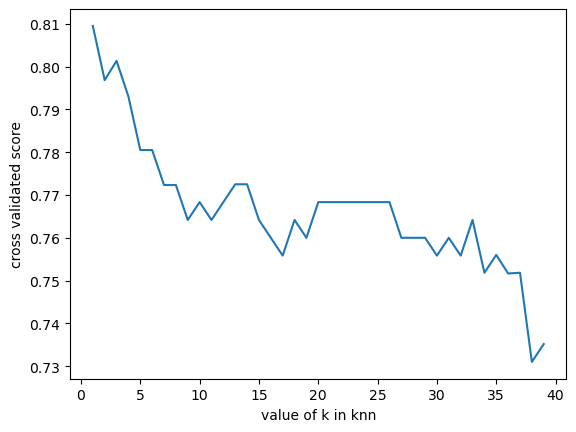

In [152]:
plt.plot(k_range,k_scores)
plt.xlabel('value of k in knn')
plt.ylabel('cross validated score')
plt.show()

In [160]:
#checking with gridsearch cv for better understanding 
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [161]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,y)

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [162]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.7927721088435374


In [163]:
#visualizing with cv results 
k_range = range(1,30)
k_scores = []

In [164]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv = 10,scoring ='accuracy')
    k_scores.append(scores.mean())

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

In [165]:
pd.Series(k_scores).sort_values(ascending=False)

0     0.809500
2     0.801333
1     0.796833
3     0.793000
5     0.780500
4     0.780500
13    0.772500
12    0.772500
6     0.772333
7     0.772333
21    0.768333
22    0.768333
23    0.768333
24    0.768333
25    0.768333
11    0.768333
20    0.768333
9     0.768333
19    0.768333
8     0.764167
14    0.764167
10    0.764167
17    0.764167
18    0.760000
15    0.760000
26    0.760000
27    0.760000
28    0.760000
16    0.755833
dtype: float64

In [166]:
## with k= 2 implementing our KNN 
knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(X,y)
pred = knn.predict(X)

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [167]:
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
       2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
       2., 2., 3., 1., 1., 3., 3., 2., 1., 1., 1., 3., 3., 3., 3., 1., 5.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 2., 6., 2., 5., 3., 2., 7.,
       6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 5., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [171]:
print(confusion_matrix(y,pred))

[[62  0  0  0  0  0]
 [ 8 51  0  0  0  0]
 [ 6  1  7  0  0  0]
 [ 0  0  0 70  0  0]
 [ 0  1  0  0  6  0]
 [ 0  2  1  2  1 23]]


In [170]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

         1.0       0.82      1.00      0.90        62
         2.0       0.93      0.86      0.89        59
         3.0       0.88      0.50      0.64        14
         5.0       0.97      1.00      0.99        70
         6.0       0.86      0.86      0.86         7
         7.0       1.00      0.79      0.88        29

    accuracy                           0.91       241
   macro avg       0.91      0.84      0.86       241
weighted avg       0.92      0.91      0.90       241

